<a href="https://colab.research.google.com/github/Elbereth-Elentari/Book_recommender/blob/master/Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
cat = pd.read_json('/content/drive/My Drive/Library_catalogue_preprocessed.jl', lines=True, orient='records')
cat.head()

,title,author,storage,WD_signature,publisher,year,pages,language,tokens,interesting
0,Pomiary fizyczne za pomocą komputera : dla stu...,"Jagiełło, Michał (1941-2016).",magazyn,QC39 .P58 1999,Wydaw. Naukowe UAM,9999,238,pl,"[pomiara, fizyczny, pomoc, komputer, student, ...",
1,Poszukiwanie prawdy : uwolnienie od iluzji,"Andrykowski, Janusz (1935- ).",magazyn,DK4133 .L47 1992 t.1,Studio,2021,406,pl,"[poszukiwanie, prawda, uwolnienie, iluzja]",
2,Wielki Pierd : opowiadania historyczne,"Bednarczyk, Ryszard (1953- ).",magazyn,,Drukpol sp.j,2020,146,pl,"[wielki, pierd, opowiadanie, historyczny]",
3,Instrumentalne wszczynanie postępowań karnych ...,"Ladziński, Andrzej.",magazyn,KKP3693 .L337 2020,TNOiK.,2020,122,pl,"[instrumentalny, wszczynanie, postępowanie, ka...",
4,Wszystko nie tak! 2,"Frączyk, Izabella (1970- ).",,PG7206.R335 W793 2020,Prószyński i S,2020,461,pl,[2],


In [154]:
def count_books(catalogue, year_list):
    return [len(catalogue[catalogue['year'] == year]) for year in year_list]

def calculate_mean_lengths(catalogue, year_list):
    return [np.mean(catalogue[catalogue['year'] == year]['pages']) for year in year_list]

In [155]:
cat_20_21 = cat[(cat['year'] >= 1900) & (cat['year'] < 2020)]

years = list(cat_20_21.year.unique())
years.sort()

book_counts = count_books(cat_20_21, years)
book_lengths = calculate_mean_lengths(cat_20_21, years)

cat_20_21_en = cat_20_21[cat_20_21['language'] == 'en']

en_book_counts = count_books(cat_20_21_en, years)
en_book_lengths = calculate_mean_lengths(cat_20_21_en, years)

In [152]:
def create_extrema_list(parameter_list, extrema_boundaries, min_or_max):
    return [min_or_max(parameter_list[boundary[0]:boundary[1]]) for boundary in extrema_boundaries]

def create_year_list(parameter_list, extrema_list, year_list):
    return [year_list[parameter_list.index(extremum)] for extremum in extrema_list]

In [159]:
length_maxima_boundaries = [(5,15), (35,38), (39,44), (50,60), (85,90)]
length_maxima = create_extrema_list(book_lengths, length_maxima_boundaries, max)
length_minima_boundaries = [(15,20), (37,40), (40,50), (90,100)]
length_minima = create_extrema_list(book_lengths, length_minima_boundaries, min)

years_for_max_lengths = create_year_list(book_lengths, length_maxima, years)
years_for_min_lengths = create_year_list(book_lengths, length_minima, years)

count_maxima_boundaries = [(35,40), (75,84), (90,101), (118,119), (105,120)]
count_maxima = create_extrema_list(book_counts, count_maxima_boundaries, max)
count_minima_boundaries = [(38,42), (119,120)]
count_minima = create_extrema_list(book_counts, count_minima_boundaries, min)

years_for_max_counts = create_year_list(book_counts, count_maxima, years)
years_for_min_counts = create_year_list(book_counts, count_minima, years)

In [163]:
def transform_count(count):
    if count < 1000:
        return str(count)
    else:
        return f'{str(count)[:-3]} k'

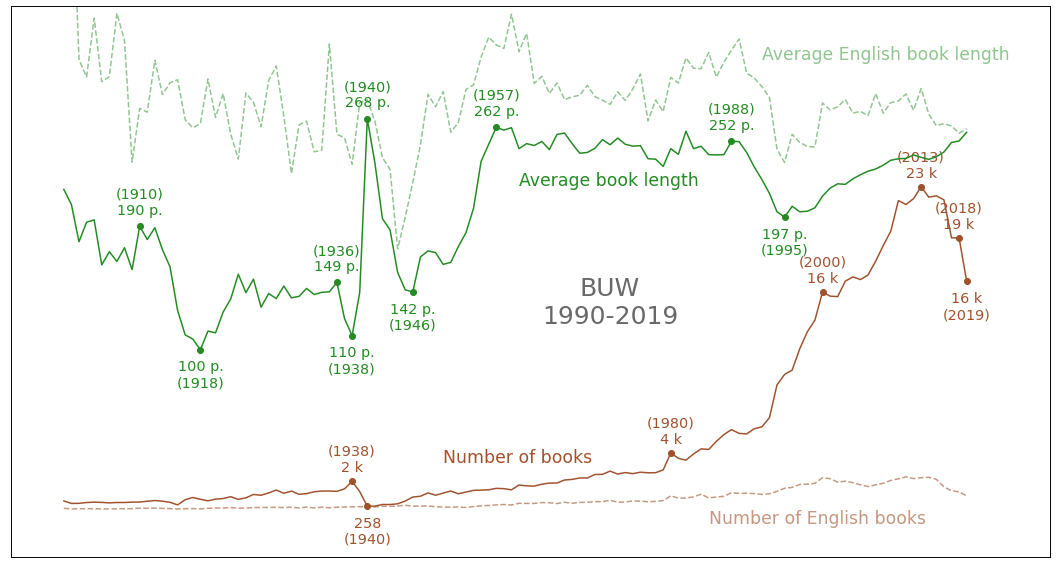

In [164]:
fig, ax1 = plt.subplots(figsize=(15,8))

color = 'sienna'
ax1.plot(years, book_counts, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1.scatter(years_for_max_counts, count_maxima, color=color)
annotation_parameters = {'textcoords':'offset points', 'size':'x-large', 'ha':'center'}
for count, year in zip(count_maxima, years_for_max_counts):
    ax1.annotate(f'({year})\n'+transform_count(count), (year,count),
                 xytext=(0,10), color=color, **annotation_parameters)

ax1.scatter(years_for_min_counts, count_minima, color=color)
for count, year in zip(count_minima, years_for_min_counts):
    ax1.annotate(transform_count(count)+f'\n({year})', (year,count),
                 xytext=(0,-37), color=color, **annotation_parameters)

ax1.text(1950, 3500, 'Number of books', color=color, size='xx-large')

ax1.set_ylim([-3500,37000])
ax1.set_xlim([1893,2030])

ax1.plot(years, en_book_counts, '--', color=color, alpha=0.6)
ax1.text(1985, -1000, 'Number of English books', color=color, alpha=0.6, size='xx-large')


ax2 = ax1.twinx()

color = 'forestgreen'
ax2.plot(years, book_lengths, color=color)

ax2.scatter(years_for_max_lengths, length_maxima, color=color)
for length, year in zip(length_maxima, years_for_max_lengths):
    ax2.annotate(f'({year})\n{int(length)} p.', (year,length), 
                 xytext=(0,12), color=color, **annotation_parameters)
ax2.scatter(years_for_min_lengths, length_minima, color=color)
for length, year in zip(length_minima, years_for_min_lengths):
    ax2.annotate(f'{int(length)} p.\n({year})', (year,length),
                 xytext=(0,-37), color=color, **annotation_parameters)

ax2.set_ylim([-50,350])
ax2.text(1960, 220, 'Average book length', color=color, size='xx-large')

ax2.plot(years, en_book_lengths, '--', color=color, alpha=0.5)
ax2.text(1992, 312, 'Average English book length', color=color, alpha=0.5, size='xx-large')

ax2.text(1972, 120, 'BUW\n1990-2019', size=25, ha='center', color='dimgrey')

ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
fig.tight_layout()
plt.show()